<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объектов-Нмаркет-Про" data-toc-modified-id="Исследование-объектов-Нмаркет-Про-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследование объектов Нмаркет Про</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-Null" data-toc-modified-id="Проверка-на-Null-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка на Null</a></span></li><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Проверка-на-аномалии" data-toc-modified-id="Проверка-на-аномалии-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка на аномалии</a></span></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Добавление признаков</a></span></li><li><span><a href="#Первичный-обзор-содержимого" data-toc-modified-id="Первичный-обзор-содержимого-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Первичный обзор содержимого</a></span></li><li><span><a href="#Объекты-на-карте" data-toc-modified-id="Объекты-на-карте-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Объекты на карте</a></span></li></ul></li><li><span><a href="#Обзор-групп" data-toc-modified-id="Обзор-групп-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор групп</a></span><ul class="toc-item"><li><span><a href="#По-населенным-пунктам" data-toc-modified-id="По-населенным-пунктам-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>По населенным пунктам</a></span></li></ul></li><li><span><a href="#Старт-сервера" data-toc-modified-id="Старт-сервера-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Старт сервера</a></span></li></ul></div>

 # Исследование объектов Нмаркет Про

Задачи исследования

- Количество квартир имеющихся в продаже в сервисе.
  - Сколько студий, 1к, 2к, 3к, 4к
  
- Распределение новостроек по районам
- Распределение цен по районам
- Зависимость цен от этажности
- Зависимость цен от застройщика

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
#import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go # or plotly.express as px
import plotly
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

# import dash
# from dash import dcc
# from dash import html
show_docs=False
from keplergl import KeplerGl

from math import ceil

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
#pip install -U kaleido

In [4]:
import plotly.io as pio
pio.renderers.default = "svg" # only for GitHub, comment for 
                              # Plotly's interactive

In [5]:
df = pd.read_csv('datasets/nmarket.csv')

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
display(df.sample(5))

id     type property_type  category              creation_date           last_update_date  manually_added  mortgage  haggle                       renovation                                        description  new_flat  rooms         balcony bathroom_unit  floor  floors_total building_name        building_type building_phase building_section  built_year  ready_quarter  lift  parking  ceiling_height  nmarket_complex_id  nmarket_building_id country                 region district    locality_name sub_locality_name non_admin_sub_locality              address apartment   latitude  longitude                    name  time_on_foot  time_on_transport     price    area  living_space  kitchen_space
1140  1141  продажа         жилая  квартира  2020-02-25T13:56:13+00:00  2021-05-31T14:30:30+00:00               0      True   False                 Черновая отделка  Квартира: 1 ккв 37, 93 кв.м.,  3 этаж в компле...         1      1          лоджия   совмещенный      3            13      NEW TIME           монолитный      Очередь 5         Корпус 3        2022              3     1      1.0            2.75               49585                64063  Россия        Санкт-Петербург      NaN  Санкт-Петербург        Приморский             Приморский    Глухарская ул.,         217  60.033473  30.195885  Комендантский проспект           NaN               15.0   6368724   37.93         18.48          10.86
1120  1121  продажа         жилая  квартира  2020-02-25T13:55:59+00:00  2021-05-31T14:30:30+00:00               0      True   False                 Черновая отделка  Студия:  22, 41 кв.м.,  5 этаж в комплексе NEW...         1      1          лоджия   совмещенный      5            13      NEW TIME           монолитный      Очередь 5         Корпус 3        2022              3     1      1.0            2.75               49585                64063  Россия        Санкт-Петербург      NaN  Санкт-Петербург        Приморский             Приморский    Глухарская ул.,         229  60.033473  30.195885  Комендантский проспект           NaN               15.0   4213982   22.41         14.13          14.13
987    988  продажа         жилая  квартира  2020-02-26T10:12:56+00:00  2021-06-01T07:40:00+00:00               0      True   False  Подготовка под чистовую отделку  Квартира: 3 ккв 79, 52 кв.м.,  8 этаж в компле...         1      3          лоджия             2      8            12         Модум  кирпично-монолитный      Очередь 1         Корпус 2        2022              4     1      1.0            2.75               63896                64061  Россия        Санкт-Петербург      NaN  Санкт-Петербург        Приморский             Приморский    Глухарская ул.,         598  60.033615  30.204512  Комендантский проспект           NaN               10.0  17748864   79.52         40.15          11.89
1513  1514  продажа         жилая  квартира  2019-05-14T13:18:13+00:00  2021-02-04T11:01:21+00:00               0      True   False                 Черновая отделка  Квартира: 4 ккв 273, 00 кв.м.,  1 этаж в компл...         1      4  балкон+терраса             2      1             3        Resort  кирпично-монолитный      Очередь 1       Корпус 106        2021              2     1      1.0            0.00               62222                62235  Россия  Ленинградская область      NaN         Красницы        Гатчинский             Гатчинский     Красницы дер.,           1  59.460997  30.329685                 Купчино           NaN               60.0  51870000  273.00         61.92          87.37
1835  1836  продажа         жилая  квартира  2019-06-05T16:48:37+00:00  2021-02-04T11:01:23+00:00               0      True   False                 Черновая отделка  Квартира: 2 ккв 98, 41 кв.м.,  3 этаж в компле...         1      2       2 балкона             2      3             4         LATTE  кирпично-монолитный      Очередь 1       Корпус 110        2022              3     1      1.0            0.00               62404                62408  Россия  Ленинградская область   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2005 non-null   int64  
 1   type                    2005 non-null   object 
 2   property_type           2005 non-null   object 
 3   category                2005 non-null   object 
 4   creation_date           2005 non-null   object 
 5   last_update_date        2005 non-null   object 
 6   manually_added          2005 non-null   int64  
 7   mortgage                2005 non-null   bool   
 8   haggle                  2005 non-null   bool   
 9   renovation              2000 non-null   object 
 10  description             2005 non-null   object 
 11  new_flat                2005 non-null   int64  
 12  rooms                   2005 non-null   int64  
 13  balcony                 2000 non-null   object 
 14  bathroom_unit           2000 non-null   

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df.describe().T

count       mean       std       min       25%       50%        75%        max
id                  2005.0     1003.0     578.9       1.0     502.0    1003.0     1504.0     2005.0
manually_added      2005.0        0.0       0.0       0.0       0.0       0.0        0.0        0.0
new_flat            2005.0        1.0       0.0       1.0       1.0       1.0        1.0        1.0
rooms               2005.0        1.6       0.9       1.0       1.0       1.0        2.0        6.0
floor               2005.0        7.9       5.4       1.0       3.0       7.0       11.0       27.0
floors_total        2005.0       13.1       5.4       1.0      12.0      12.0       18.0       27.0
built_year          2005.0     2022.0       1.0    2014.0    2022.0    2022.0     2022.0     2024.0
ready_quarter       2005.0        3.4       0.8       1.0       3.0       4.0        4.0        4.0
lift                2005.0        1.0       0.0       1.0       1.0       1.0        1.0        1.0
parking             1944.0        1.0       0.0       1.0       1.0       1.0        1.0        1.0
ceiling_height      2005.0        2.4       1.0       0.0       2.7       2.8        2.8        3.7
nmarket_complex_id  2005.0    55841.7   21750.8     542.0   49585.0   62404.0    65673.0    77368.0
nmarket_building_id 2005.0    66676.5    6817.7    1820.0   62408.0   64061.0    77063.0    77394.0
latitude            2005.0       60.0       0.2      59.5      59.9      60.0       60.1       60.1
longitude           2005.0       30.3       0.1      30.0      30.2      30.3       30.4       30.6
time_on_foot         624.0        9.3       6.5       3.0       5.0       5.0       15.0       20.0
time_on_transport   1380.0       15.9      15.7       5.0      10.0      10.0       15.0       60.0
price               2005.0 10659746.6 9705870.0 2810000.0 5495400.0 7489208.0 12814848.0 82788300.0
area                2005.0       62.2      90.2      20.8      33.3      48.4       65.7     1757.0
living_space        2005.0       25.2      14.6       1.0      14.6      22.2       30.5      136.9
kitchen_space       2005.0       19.8      10.6       1.0      13.7      18.6       22.2       87.4

In [10]:
df = df.rename(columns={"name": "metro"})

## Проверка на Null

In [11]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [12]:
pd.reset_option("display.float_format")
missing_zero_values_table(df)

Your selected dataframe has 45 columns and 2005 Rows.
There are 9 columns that have missing values.


Zero Values  Missing Values  % of Total Values  Total Zero Missing Values  % Total Zero Missing Values Data Type
district                     0            1809               90.2                       1809                         90.2    object
time_on_foot                 0            1381               68.9                       1381                         68.9   float64
time_on_transport            0             625               31.2                        625                         31.2   float64
sub_locality_name            0             196                9.8                        196                          9.8    object
parking                      0              61                3.0                         61                          3.0   float64
renovation                   0               5                0.2                          5                          0.2    object
balcony                      0               5                0.2                          5                          0.2    object
bathroom_unit                0               5                0.2                          5                          0.2    object
metro                        0               1                0.0                          1                          0.0    object

Предполагаем что пропущенные значения в balcony, parking, renovation свидетельствуют об отсутсвии, bathroom_unit заменим на совмещенный, наименование станции метро проверим на основании адреса здания, при не совпадении отметим как "нет". time_on_foot и time_on_transport заменим на -1. Остальные столбцы проверим на дубликаты далее.

In [13]:
df.parking = df.parking.fillna(0)
df.balcony = df.balcony.fillna('нет')
df.renovation = df.renovation.fillna('Черновая отделка')
df.bathroom_unit = df.bathroom_unit.fillna('совмещенный')

In [14]:
df[df['address'].str.contains('Приморский')]

id     type property_type  category              creation_date           last_update_date  manually_added  mortgage  haggle        renovation                                        description  new_flat  rooms  balcony bathroom_unit  floor  floors_total building_name        building_type building_phase building_section  built_year  ready_quarter  lift  parking  ceiling_height  nmarket_complex_id  nmarket_building_id country           region district    locality_name sub_locality_name non_admin_sub_locality                   address apartment   latitude  longitude metro  time_on_foot  time_on_transport     price   area  living_space  kitchen_space
1857  1858  продажа         жилая  квартира  2019-07-15T12:15:35+00:00  2021-04-02T11:16:00+00:00               0      True   False  Черновая отделка  Квартира: 4 ккв 231, 90 кв.м.,  8 этаж в компл...         1      4  терраса             2      8             8   Лахта Плаза  кирпично-монолитный      Очередь 2         Корпус А        2016              3     1      1.0            2.75               62646                62649  Россия  Санкт-Петербург      NaN  Санкт-Петербург        Приморский             Приморский  Приморский пр.,  д. 78/2      33-Н  59.987588   30.18798   NaN           NaN                NaN  82788300  231.9          72.5           74.5

In [15]:
df.metro = df.metro.fillna('нет')

In [16]:
df.time_on_foot = df.time_on_foot.fillna(-1)
df.time_on_transport = df.time_on_transport.fillna(-1)

## Замена типов данных

In [17]:
df['creation_date'] = pd.to_datetime(df['creation_date'])
df['last_update_date'] = pd.to_datetime(df['creation_date'])

df['parking'] = df['parking'].apply(lambda x: int(x))

In [18]:
print(df.creation_date.max())
print(df.creation_date.min())
df.creation_date.max()-df.creation_date.min()

2021-06-09 08:35:58+00:00
2019-03-07 13:39:55+00:00


Timedelta('824 days 18:56:03')

## Проверка дубликатов

In [19]:
df.duplicated().sum()

0

Проверим соответствия между районами

In [20]:
print(df.district.unique())
print()
print(df.sub_locality_name.unique())
print()
print(df.non_admin_sub_locality.unique())

[nan 'Тосненский район' 'Всеволожский район' 'Петродворцовый район'
 'Приморский район' 'Пушкинский район' 'Гатчинский район'
 'Ломоносовский район' 'Колпинский район']

['Калининский' 'Московский' 'Выборгский' 'Всеволожский' nan
 'Красногвардейский' 'Адмиралтейский' 'Приморский' 'Фрунзенский'
 'Кировский' 'Красносельский' 'Гатчинский']

['Калининский' 'Московский' 'Выборгский' 'Всеволожский' 'Тосненский'
 'Красногвардейский' 'Адмиралтейский' 'Приморский' 'Петродворцовый'
 'Пушкинский' 'Фрунзенский' 'Гатчинский' 'Кировский' 'Красносельский'
 'Ломоносовский' 'Колпинский']


In [21]:
df.district = df.district.fillna(' район')

In [22]:
df.district = df.district.apply(lambda x: x.replace(' район', '', 1))

In [23]:
df.sub_locality_name = df.sub_locality_name.fillna('')

In [24]:
print(df[df['district']==df['sub_locality_name']].shape)
print(df[df['district']==df['non_admin_sub_locality']].shape)
print(df[df['non_admin_sub_locality']==df['sub_locality_name']].shape)
print(df[df['non_admin_sub_locality']==df['sub_locality_name']].shape[0] + \
                df[df['district']==df['non_admin_sub_locality']].shape[0])

(0, 45)
(196, 45)
(1809, 45)
2005


In [25]:
pd.set_option('display.max_rows', 100)

In [26]:
df[['district','sub_locality_name','non_admin_sub_locality', 'region']].sample(20, random_state=2)

district sub_locality_name non_admin_sub_locality                 region
472                        Московский             Московский        Санкт-Петербург
807                        Приморский             Приморский        Санкт-Петербург
675                        Приморский             Приморский        Санкт-Петербург
642                        Приморский             Приморский        Санкт-Петербург
1814                       Гатчинский             Гатчинский  Ленинградская область
1309   Всеволожский                             Всеволожский  Ленинградская область
981                        Приморский             Приморский        Санкт-Петербург
960                        Приморский             Приморский        Санкт-Петербург
418                      Всеволожский           Всеволожский  Ленинградская область
180                      Всеволожский           Всеволожский  Ленинградская область
1686                       Выборгский             Выборгский        Санкт-Петербург
570                        Приморский             Приморский        Санкт-Петербург
1753  Ломоносовский                            Ломоносовский  Ленинградская область
1851                       Гатчинский             Гатчинский  Ленинградская область
270                      Всеволожский           Всеволожский  Ленинградская область
977                        Приморский             Приморский        Санкт-Петербург
352                      Всеволожский           Всеволожский  Ленинградская область
1358                       Приморский             Приморский        Санкт-Петербург
1632                       Выборгский             Выборгский        Санкт-Петербург
1217                      Фрунзенский            Фрунзенский        Санкт-Петербург

Нет зависимости района внесенного в разные столбцы от принадлежности к области или городу - например Всеволожский район внесен в разные столбцы.

При этом значения столбцов district и sub_locality_name содержатся в non_admin_sub_locality. Удалим дублирующие столбцы

In [27]:
del df['district']
del df['sub_locality_name']

## Проверка на аномалии

Заменим нулевые значения высоты потолка на среднее

In [28]:
(df['ceiling_height'] == 0).sum()

277

In [29]:
ceiling_height_mean = round(df[df['ceiling_height']!=0]['ceiling_height'].mean(), 1)
ceiling_height_mean

2.8

In [30]:
df.ceiling_height.loc[df.ceiling_height ==0] = ceiling_height_mean

In [31]:
df['ceiling_height'].value_counts()

2.75    711
2.80    505
3.00    412
2.70    140
2.60     91
3.20     67
2.72     60
2.85     11
3.70      8
Name: ceiling_height, dtype: int64

## Добавление признаков

In [32]:
df['price_per_meter'] = df['price'] / df['area']

## Первичный обзор содержимого

In [33]:
df.shape

(2005, 44)

In [34]:
df.country.unique()

array(['Россия'], dtype=object)

In [35]:
df.locality_name.unique()

array(['Санкт-Петербург', 'Лаврики', 'Аннолово', 'Бугры', 'Петергоф',
       'Лахта', 'Пушкин', 'Заневское', 'Янино-1', 'Гатчина', 'Красницы',
       'Новоселье', 'Колпино'], dtype=object)

In [36]:
df.building_name.unique()

array(['БелАрт', 'Moskovsky AVENIR', 'Аура', 'ID Murino 2',
       'ID Парк Победы', 'Есенин Village', 'SHINE', 'Артхаус', 'Модум',
       'Энфилд', 'Петергофские дачи', 'Лахта Парк', 'INKERI',
       'Ultra City', 'NEW TIME', 'Valo', 'ЯСНО.Янино', 'Jaanila Drive',
       'IQ Гатчина', 'Трилогия', 'Duderhof club', 'Идеалист',
       'Новое Купчино', 'Resort', 'Villas Spa', 'Start', 'NEWПитер',
       'Pushkin', 'Nordic', 'LATTE', 'Лахта Плаза', 'Б57', 'Континенты',
       'Юттери'], dtype=object)

In [37]:
int(df.shape[0]/df.building_name.nunique())

58

In [38]:
int(df.shape[0]/df.locality_name.nunique())

154

In [39]:
exclude_columns = ['latitude', 'longitude']

In [40]:
def check_num_columns(column_name,
                      list_less_class,
                      list_more_class,
                      list_numeric,
                      num_devider=3,
                      exclude_columns=None):
    num_unique = df[column_name].nunique()
    huge_num_devider = num_devider * 30
    column_type = type(df[column_name][0])

    if 'id' not in column_name:
        if num_unique < num_devider:
            list_less_class.append(column_name)
        elif huge_num_devider > num_unique >= num_devider and column_type == str:
            list_more_class.append(column_name)
        elif column_type != str and column not in exclude_columns:
            list_numeric.append(column_name)

In [41]:
list_less_class = []
list_more_class = []
list_numeric = []

for column in df.columns:  
    check_num_columns(column, 
                      list_less_class,
                      list_more_class,
                      list_numeric,
                      num_devider=3,
                      exclude_columns=exclude_columns)

In [42]:
list_less_class

['type',
 'property_type',
 'category',
 'manually_added',
 'mortgage',
 'haggle',
 'new_flat',
 'lift',
 'parking',
 'country',
 'region']

In [43]:
list_more_class

['renovation',
 'balcony',
 'bathroom_unit',
 'building_name',
 'building_type',
 'building_phase',
 'building_section',
 'locality_name',
 'non_admin_sub_locality',
 'address',
 'metro']

In [44]:
list_numeric

['creation_date',
 'last_update_date',
 'rooms',
 'floor',
 'floors_total',
 'built_year',
 'ready_quarter',
 'ceiling_height',
 'time_on_foot',
 'time_on_transport',
 'price',
 'area',
 'living_space',
 'kitchen_space',
 'price_per_meter']

In [45]:
def bar_plot(data, column):
    return go.Bar(y=data[column].value_counts(), 
                  x=data[column].value_counts().index, 
                  name=column)

def hist_plot(data, column):
    return go.Histogram(x=df[column],
                        name=column)

def hist_hor_plot(data, column, color):
    return go.Histogram(y=df[column],
                        name=column,
                        marker=color)


def box_plot(data, column, color):
    return go.Box(y = data[column],
                    boxpoints='all', # can also be outliers, or suspectedoutliers, or False
                    jitter=0.3, # add some jitter for a better separation between points
                    pointpos=-1.8, # relative position of points wrt box
                    name=column,
                    marker=color)

In [46]:
def subplot_show(plot=None, # kind plot function
                 data=None, # dataframe
                 columns=None, # columns for plotting
                 title=None, # title
                 row_num=None, # number rows
                 col_num=None, # number columns
                 v_space=None, # vertical space between plots
                 **kwargs):
    
    '''Show subplots'''
    
    names = {str(pos): name for pos, name in enumerate(columns)}
    row_num=int(len(columns) / col_num + 1)
    fig = make_subplots(rows=row_num, 
                        cols=col_num, 
                        shared_yaxes=False, 
                        subplot_titles=list(names.keys()),
                        vertical_spacing = v_space,
                       )
    
    row = (i for i in range(1, row_num+1) for y in range(1, col_num+1))
    col = (y for i in range(1, row_num+1) for y in range(1, col_num+1))


    for column in columns:
        fig.add_trace(plot(data, column),
                    row=next(row), col=next(col))
        
    fig.update_layout(title_text=title, **kwargs, autosize=True)
    fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
    fig.show()

In [47]:
def subplot_show_double(plot1=None, # kind plot function
                  plot2=None,
                 data=None, # dataframe
                 columns=None, # columns for plotting
                 title=None, # title
                 row_num=None, # number rows
                 col_num=None, # number columns
                 v_space=None, # vertical space between plots
                 **kwargs):
    
    '''Show subplots'''
    cols = plotly.colors.DEFAULT_PLOTLY_COLORS*int(len(list_numeric)/5)
    
    names = {str(pos): name for pos, name in enumerate(
        [x for i, x in enumerate(list_numeric) for y in range(0, 2)]) for y in range(0, 2)}
    
    row_num=int(len(columns) / col_num + 1) * 2
    fig = make_subplots(rows=row_num, 
                        cols=col_num, 
                        shared_yaxes=True, 
                        subplot_titles=list(names.keys()),
                        vertical_spacing = v_space,
                       )
    
    row = (i for i in range(1, row_num+1) for y in range(1, col_num+1))
    col = (y for i in range(1, row_num+1) for y in range(1, col_num+1))


    for i, column in enumerate(columns):
        fig.add_trace(plot2(data, column, dict(color=cols[i])),
                    row=next(row), col=next(col))
        fig.add_trace(plot1(data, column, dict(color=cols[i])),
                    row=next(row), col=next(col))

        
        
    fig.update_layout(title_text=title, **kwargs, autosize=True)
    fig.for_each_annotation(lambda a: a.update(text = names[a.text]))
    fig.show()

In [48]:
subplot_show_double(hist_hor_plot, box_plot, df, list_numeric, 
             'Histogramm + boxplot overview', 
             col_num=2, 
             height=5000, 
             width=1000,
             v_space=0.01,
             showlegend=False
            )

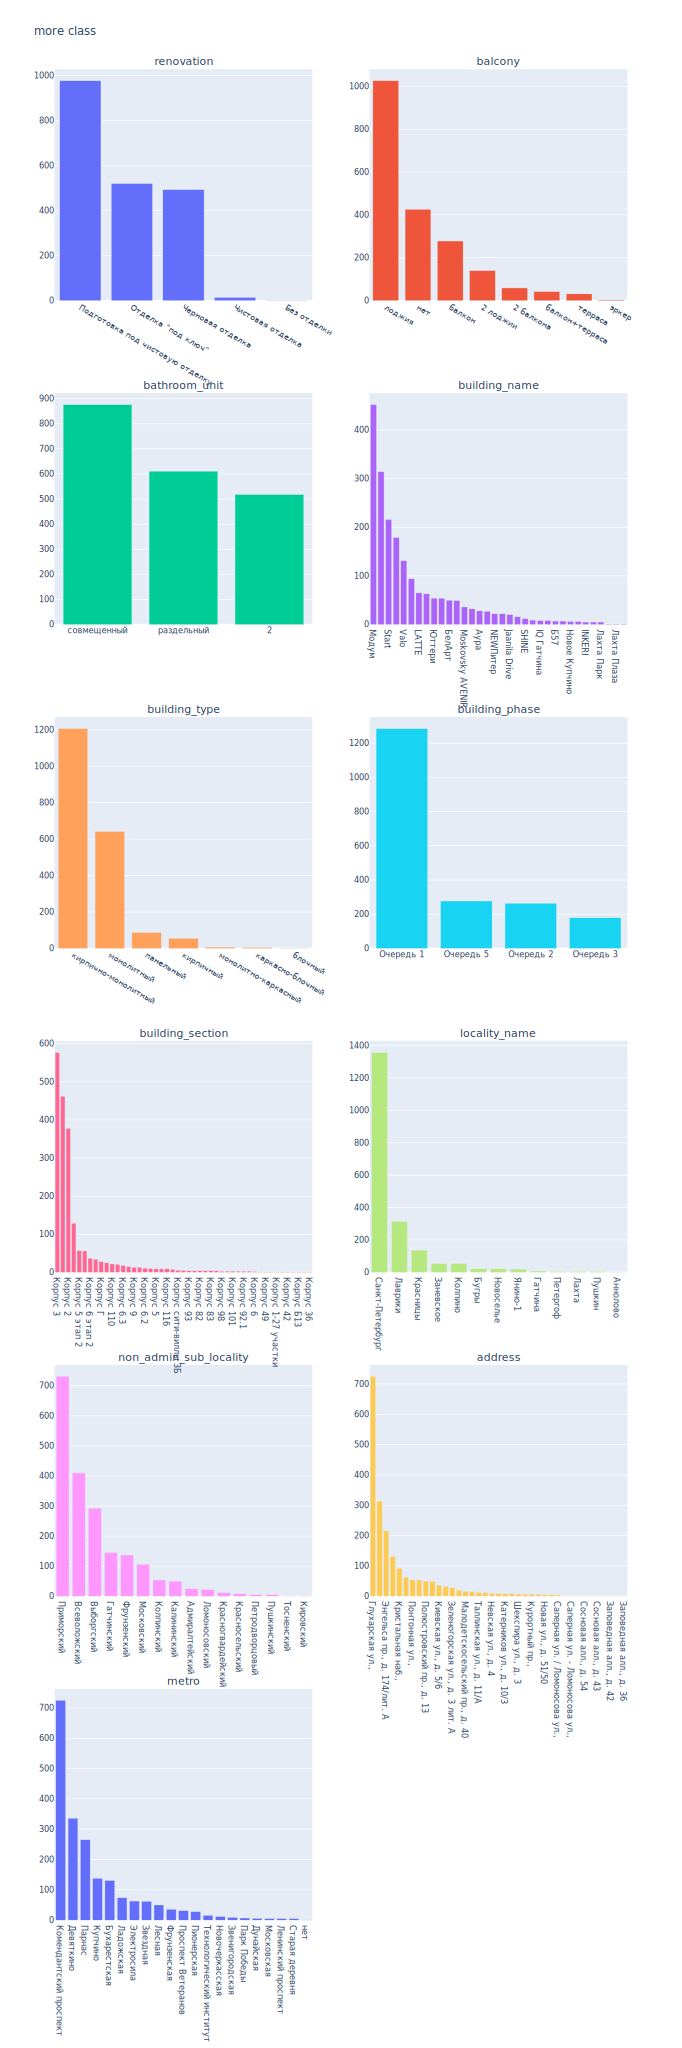

In [49]:
subplot_show(bar_plot, df, list_more_class, 
             'more class', 
             col_num=2, 
             height=3000, 
             width=1000,
             v_space=0.05,
             showlegend=False
            )

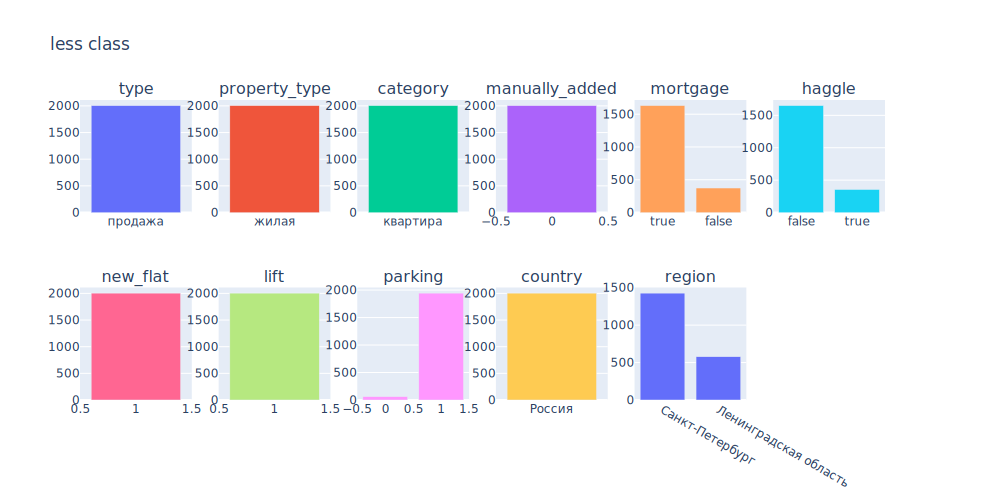

In [50]:
subplot_show(bar_plot, df, list_less_class, 'less class', col_num=6, width=1000, showlegend=False)

## Объекты на карте

In [51]:
#conda create -n geo python=3.9 -y

In [52]:
#conda activate geo

In [53]:
#conda install geopandas

In [54]:
#conda install mamba -c conda-forge

In [55]:
#mamba install localtileserver keplergl pydeck leafmap -c conda-forge

In [56]:
import os
import subprocess
import leafmap.foliumap as leafmap
import leafmap

In [57]:
Map = leafmap.Map(center=(59.95, 30.3),
                zoom=10, 
                draw_control=False,
                measure_control=False,
                fullscreen_control=False,
                attribution_control=True)
Map.add_xy_data(df, x="longitude", y="latitude", layer_name="World Cities")
Map

Map(center=[59.95, 30.3], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [58]:
#conda install -c conda-forge keplergl

In [59]:
import leafmap.kepler as leafmap

In [60]:
df.to_csv('files/df.csv')

In [61]:
m = leafmap.Map(center=[59.95, 30.3], zoom=10)
in_csv = ('/Users/romankuzmin/projects/nmarket/files/df.csv')
m.add_csv(in_csv, layer_name="nmarket")
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 59.95, 'longitude': 30.3, 'zoom': 10, 'bearin…

In [62]:
df_map = df.copy(deep=True)
del df_map['creation_date']
del df_map['last_update_date']

In [63]:
# load the config
%run files/map_config.py

In [64]:
map_1 = KeplerGl(height=600, data={"building_name": df_map}, config=config, show_docs=False)
map_1

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'aat5hkr', 'type': …

In [65]:
with open('files/map_config.py', 'w') as f:
    f.write('config = {}'.format(map_1.config))

# Обзор групп

## По населенным пунктам

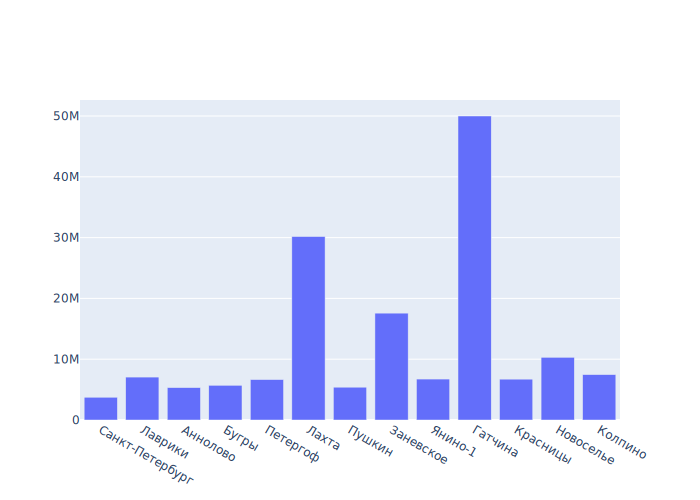

In [66]:
fig = go.Figure([go.Bar(
       y=df.groupby('locality_name')['price'].mean(),
       x=df.locality_name.unique(),
       name=column,
       )])
fig.show()

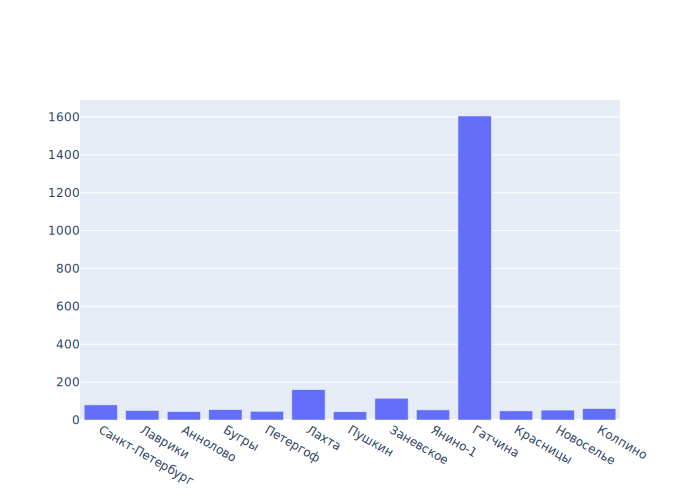

In [67]:
fig = go.Figure([go.Bar(
       y=df.groupby('locality_name')['area'].mean(),
       x=df.locality_name.unique(),
       name=column,
       )])
fig.show()

# Старт сервера